In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# For Preprocessing, ML models and Evaluation
from sklearn.model_selection import train_test_split   # To split the dataset into train and test set

from sklearn.linear_model import LogisticRegression     # Logistic regression model

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder    # for converting categorical to numerical

from sklearn.metrics import f1_score

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pharma_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Training_set_advc.csv')

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Training_set_advc.csv')

In [ ]:
data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,16201,47,8433,DX2,60,21.655523,NO,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1
1,9421,3,2972,DX6,2,28.852743,NO,RURAL,Stable,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,0
2,16205,7,8608,Dx6,20,26.179725,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1
3,5582,31,10074,dx6,8,22.638945,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
4,20880,43,7462,dx1,53,21.326131,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1


#### DATA PREPARATION

In [ ]:
data.Treated_with_drugs.value_counts()

DX6                     4812
DX6                     2383
DX5                     1153
DX2                     1094
DX4                     1045
                        ... 
Dx1 dx2 dx3 dx4            1
Dx2 dx3 dx4 dx5            1
dx1 dx2 dx4 dx5            1
Dx1 dx3 dx4 dx5            1
DX1 DX2 DX3 DX4 DX5        1
Name: Treated_with_drugs, Length: 182, dtype: int64

In [ ]:
data.Patient_Smoker.value_counts()

NO             10511
YES             7833
NO              3891
YES             2710
YESS             100
YESS              26
Cannot say         4
Cannot say         2
CANNOT SAY         1
CANNOT SAY         1
Name: Patient_Smoker, dtype: int64

In [ ]:
data.Patient_Rural_Urban.value_counts()

RURAL    17482
URBAN     7597
Name: Patient_Rural_Urban, dtype: int64

In [ ]:
data.Patient_mental_condition.value_counts()

Stable    25079
Name: Patient_mental_condition, dtype: int64

#### EDA on numerical data


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25079 entries, 0 to 25078
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  25079 non-null  int64  
 1   Diagnosed_Condition        25079 non-null  int64  
 2   Patient_ID                 25079 non-null  int64  
 3   Treated_with_drugs         25071 non-null  object 
 4   Patient_Age                25079 non-null  int64  
 5   Patient_Body_Mass_Index    25079 non-null  float64
 6   Patient_Smoker             25079 non-null  object 
 7   Patient_Rural_Urban        25079 non-null  object 
 8   Patient_mental_condition   25079 non-null  object 
 9   A                          23723 non-null  float64
 10  B                          23723 non-null  float64
 11  C                          23723 non-null  float64
 12  D                          23723 non-null  float64
 13  E                          23723 non-null  flo

##### to check if we have a balanced dataset or not

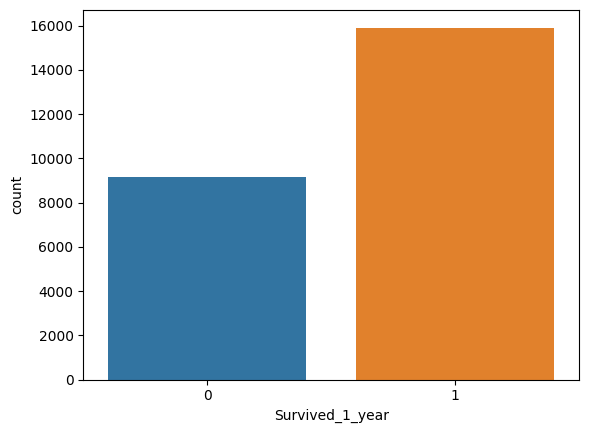

In [ ]:
sns.countplot(x='Survived_1_year', data=data)
plt.show()

In [ ]:
# getting only the numerical features
numeric_features = data.select_dtypes(include=[np.number])
numeric_features.columns

Index(['ID_Patient_Care_Situation', 'Diagnosed_Condition', 'Patient_ID',
       'Patient_Age', 'Patient_Body_Mass_Index', 'A', 'B', 'C', 'D', 'E', 'F',
       'Z', 'Number_of_prev_cond', 'Survived_1_year'],
      dtype='object')

In [ ]:
numeric_data=data[['Diagnosed_Condition', 'Patient_Age', 'Patient_Body_Mass_Index', 'Number_of_prev_cond', 'Survived_1_year']]
numeric_data.head()

,Diagnosed_Condition,Patient_Age,Patient_Body_Mass_Index,Number_of_prev_cond,Survived_1_year
0,47,60,21.655523,2.0,1
1,3,2,28.852743,3.0,0
2,7,20,26.179725,2.0,1
3,31,8,22.638945,2.0,0
4,43,53,21.326131,1.0,1


In [ ]:
# Checking the null values in numerical columns
numeric_data.isnull().sum()

Diagnosed_Condition           0
Patient_Age                   0
Patient_Body_Mass_Index       0
Number_of_prev_cond        1356
Survived_1_year               0
dtype: int64

In [ ]:
data['Number_of_prev_cond'] = data['Number_of_prev_cond'].fillna(data['Number_of_prev_cond'].mode()[0])

In [ ]:

numeric_data.isnull().sum()

Diagnosed_Condition        0
Patient_Age                0
Patient_Body_Mass_Index    0
Number_of_prev_cond        0
Survived_1_year            0
dtype: int64

In [ ]:
numeric_data.describe()

,Diagnosed_Condition,Patient_Age,Patient_Body_Mass_Index,Number_of_prev_cond,Survived_1_year
count,25079.000000,25079.000000,25079.000000,25079.000000,25079.000000
mean,26.382631,33.193548,23.439952,1.707803,0.634316
std,15.096967,19.507617,3.778849,0.768082,0.481631
min,0.000000,0.000000,1.089300,1.000000,0.000000
25%,13.000000,16.000000,20.205050,1.000000,0.000000
50%,26.000000,33.000000,23.369168,2.000000,1.000000
75%,40.000000,50.000000,26.730785,2.000000,1.000000
max,52.000000,142.000000,29.999579,5.000000,1.000000


##### The mean and median (i.e. 50%) value for all the numerical columns are nearly same.A good way to visualize the above information would be boxplots

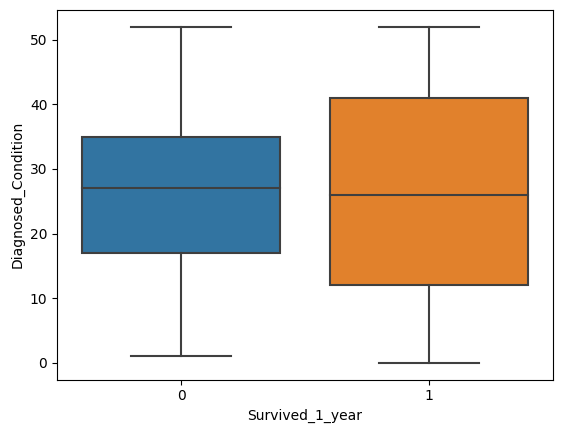

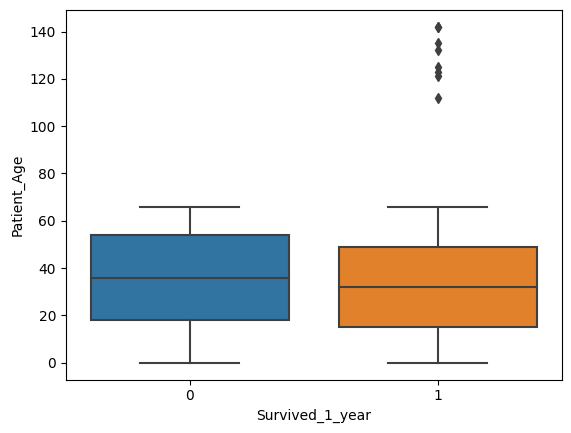

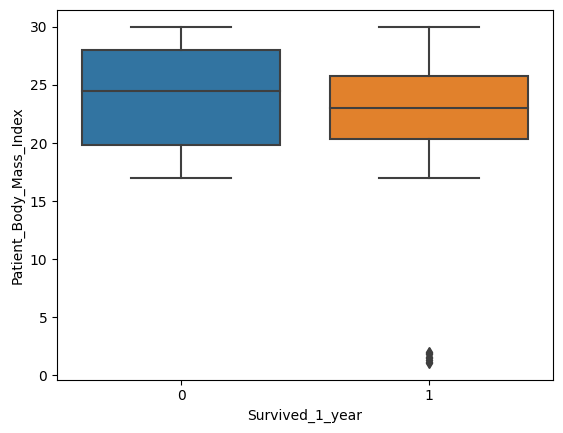

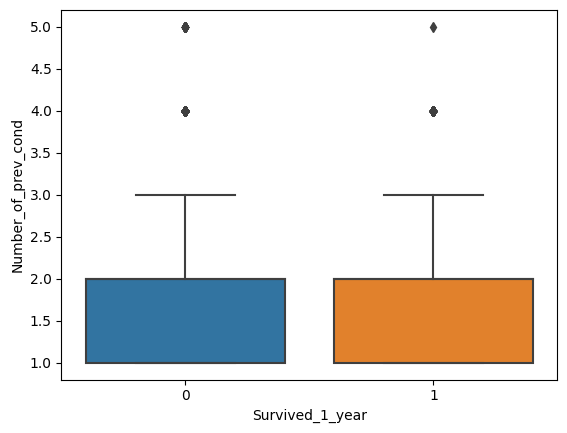

In [ ]:
for feature in numeric_data.drop('Survived_1_year', axis = 1).columns:
  sns.boxplot(x='Survived_1_year', y=feature, data=numeric_data)
  plt.show()

In [ ]:
data.isnull().sum()

ID_Patient_Care_Situation       0
Diagnosed_Condition             0
Patient_ID                      0
Treated_with_drugs              8
Patient_Age                     0
Patient_Body_Mass_Index         0
Patient_Smoker                  0
Patient_Rural_Urban             0
Patient_mental_condition        0
A                            1356
B                            1356
C                            1356
D                            1356
E                            1356
F                            1356
Z                            1356
Number_of_prev_cond             0
Survived_1_year                 0
dtype: int64

#### Filling missing values

In [ ]:
data['Treated_with_drugs']=data['Treated_with_drugs'].fillna(data['Treated_with_drugs'].mode()[0])

In [ ]:
data['A'].fillna(data['A'].mode()[0], inplace = True)
data['B'].fillna(data['B'].mode()[0], inplace = True)
data['C'].fillna(data['C'].mode()[0], inplace = True)
data['D'].fillna(data['D'].mode()[0], inplace = True)
data['E'].fillna(data['E'].mode()[0], inplace = True)
data['F'].fillna(data['F'].mode()[0], inplace = True)
data['Z'].fillna(data['Z'].mode()[0], inplace = True)

In [ ]:
data.isnull().sum()

ID_Patient_Care_Situation    0
Diagnosed_Condition          0
Patient_ID                   0
Treated_with_drugs           0
Patient_Age                  0
Patient_Body_Mass_Index      0
Patient_Smoker               0
Patient_Rural_Urban          0
Patient_mental_condition     0
A                            0
B                            0
C                            0
D                            0
E                            0
F                            0
Z                            0
Number_of_prev_cond          0
Survived_1_year              0
dtype: int64

#### EDA on categorical data

In [ ]:
categorical_data = data.drop(numeric_data.columns, axis=1)    # dropping the numerical columns from the dataframe 'data'
categorical_data.drop(['Patient_ID', 'ID_Patient_Care_Situation'], axis=1, inplace = True)    # dropping the id columns form the dataframe 'categorical data'
categorical_data.head()    # Now we are left with categorical columns only. take a look at first five observaitons

,A,B,C,D,E,F,Z,DX1,DX2,DX3,...,Dx3,Dx4,Dx5,Dx6,dx1,dx2,dx3,dx4,dx5,dx6
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
X = data.drop('Survived_1_year',axis = 1)
y = data['Survived_1_year']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

#### Model building

##### 1. LOGISTIC REGRESSION

In [ ]:
model = LogisticRegression(max_iter = 1000)     # The maximum number of iterations will be 1000. This will help you prevent from convergence warning.
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [ ]:
pred = model.predict(X_test)

In [ ]:
print(f1_score(y_test,pred))

0.7887323943661971


#### 2. RANDOM FOREST

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier

In [ ]:
forest = RandomForestClassifier(random_state=1, n_estimators=1000, max_depth=5)
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=1000, random_state=1)

In [ ]:
y_pred = forest.predict(X_test)

fscore = f1_score(y_test ,y_pred)
fscore

0.8112494753043236